In [187]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# notebook output all
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### <font color = red> Requirements

* install to use sklearn if you did not: run this `!pip install --user scikit-learn`
* install tensorflow if you did not - It may take a long time: run this  `!pip install --user tensorflow`
* You have to create a folder named `saved-model` at the same director of this python code
* Note: installing tensorflow may cause an error when you launch Jupyter Notebook again from Anaconda. If Anaconda spits out an error `markupsafe`, you can solve the issue by openning Anaconda Powershell Prompt and type `pip uninstall markupsafe`. Then `pip install markupsafe==2.0.1`. It might solve the issue.

In [188]:
# import libraries
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
plt.rc("font", size=14)
sns.set_style("ticks")
# sns.set(rc={'figure.figsize': (6, 4)}, font_scale=1)
# sns.set_style("ticks")

In [189]:
#Load Data From CSV File 
#Read the data
credit = pd.read_csv("default_of_credit_card_clients.csv", skiprows=[0])

credit.info() ##Have a look at the data 
credit.head() ##Have a look at the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [190]:
# Investigate the dataset
numeric_variables = credit.select_dtypes(include = ['int64'])
# categorical variables
categorical_variables = credit.select_dtypes(include = ['object'])
##Identifying the categorical values
categorical_variables = list(categorical_variables.columns) 


unique = numeric_variables.agg(['nunique'])
unique.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
nunique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2


In [191]:
# we can rename variable 'PAY_0' to 'PAY_1' to make it consistent
credit.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default.payment.next.month' to 'Default'
credit.rename(columns={"default payment next month": "Default"}, inplace=True)

# Class label to category
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'Default','PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5', 'PAY_6']:
    credit[col] = credit[col].astype('category')

In [192]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [193]:
#investigate missing values ang outliers first
# check missing values, we found there is no missing values
credit.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [194]:
#check negative values
#BILL_AMT1 - BILL_AMT6 have negative values, 
#but we think it is proper since ppl can overpay their credit card and get refund later on
credit.min()

ID                1
LIMIT_BAL     10000
AGE              21
BILL_AMT1   -165580
BILL_AMT2    -69777
BILL_AMT3   -157264
BILL_AMT4   -170000
BILL_AMT5    -81334
BILL_AMT6   -339603
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
dtype: int64

# Slice and Dice


## How many customers are in the sample?

There are 30,000 customers

In [195]:
credit.shape

(30000, 25)

In [196]:
credit['ID'].nunique()

30000

In [197]:
# we don't need 'ID' anymore
credit.drop('ID', axis=1, inplace=True)

## What is the most common sex in the sample?

Female gender is the most common sex

In [198]:
credit['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

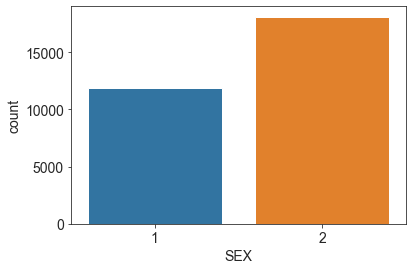

In [199]:
sns.countplot(x='SEX', data=credit)

## Which sex has the most defaults?

Observation:
- In terms of absolute values, Female group has more default cases than Male. 
- But in terms of percentage, the proportion of default cases in the Male group (24.16%) is higher than that in the Femal group (20.77%).

In [200]:
cnt1 = credit.groupby(['SEX', 'Default'])['Default'].agg('count').to_frame('default_count')
cnt1.reset_index()

,SEX,Default,default_count
0,1,0,9015
1,1,1,2873
2,2,0,14349
3,2,1,3763


In [201]:
cnt1['default_pct_by_gender'] = 100 * cnt1['default_count'] / cnt1.groupby('SEX')['default_count'].transform('sum')
cnt1.reset_index()

,SEX,Default,default_count,default_pct_by_gender
0,1,0,9015,75.832773
1,1,1,2873,24.167227
2,2,0,14349,79.223719
3,2,1,3763,20.776281


## How many distinct values does marriage take on?

Marriage has 4 distinct values: 0, 1, 2, 3

In [202]:
credit['MARRIAGE'].nunique()

4

In [203]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

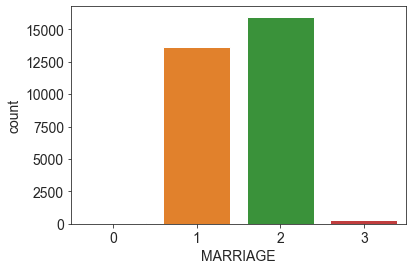

In [204]:
sns.countplot(x='MARRIAGE', data=credit)

# Histograms and Boxplots

## How is BILL_AMT1 distributed by sex?

The histogram and the boxplot by gender do not show a clear relationship between BILL_AMT1 and gender. Simply put, the visualization analysis shows that there is no difference in BILL_AMT1 by SEX.

(0.0, 500000.0, 0.0, 5960.85)

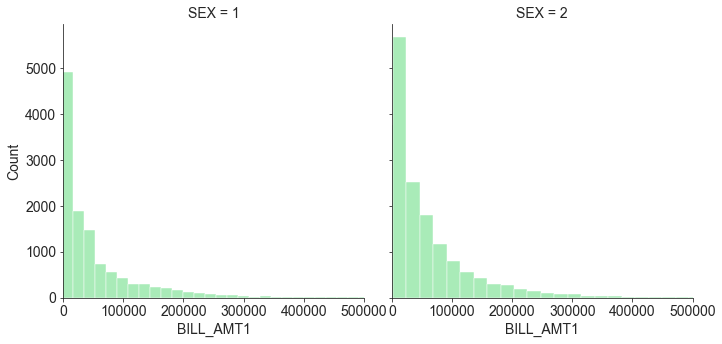

In [205]:
# histgram of BILL_AMT_1 by sex
sns.displot(data=credit, x='BILL_AMT1', col= 'SEX', common_bins=False, bins=50, color= '#8de5a1')
plt.axis(xmin=0,xmax=500000)

<AxesSubplot:xlabel='SEX', ylabel='BILL_AMT1'>

Text(0.5, 1.0, 'BILL_AMT1')

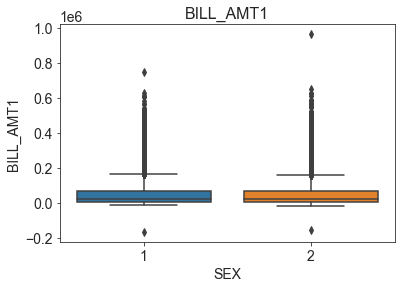

In [206]:
#boxplot of BILL_AMT_1 by sex
sns.boxplot(x='SEX', y='BILL_AMT1', data=credit)
plt.title('BILL_AMT1', size = 16)

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='LIMIT_BAL'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='AGE'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='BILL_AMT1'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='BILL_AMT2'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='BILL_AMT3'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='BILL_AMT4'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='BILL_AMT5'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='BILL_AMT6'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='PAY_AMT1'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='PAY_AMT2'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='PAY_AMT3'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='PAY_AMT4'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='PAY_AMT5'>

<Figure size 1224x72 with 0 Axes>

<AxesSubplot:xlabel='PAY_AMT6'>

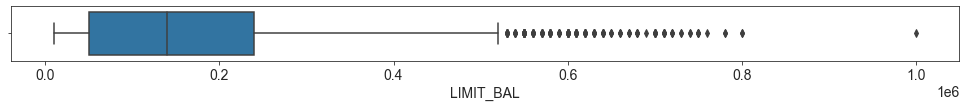

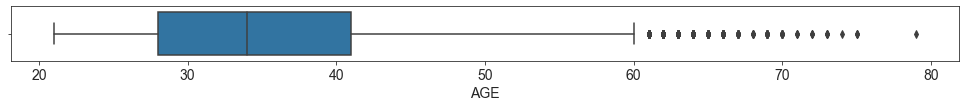

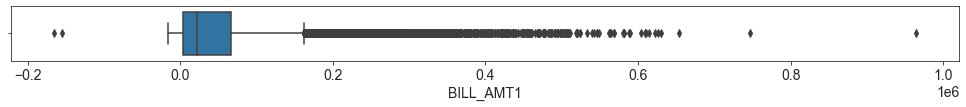

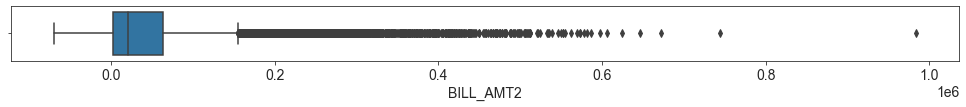

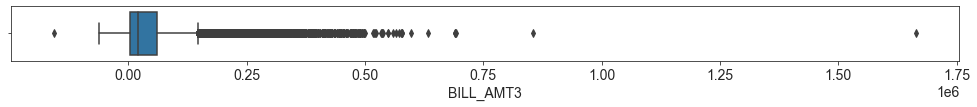

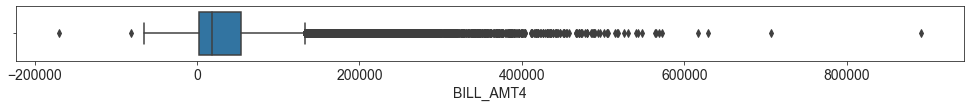

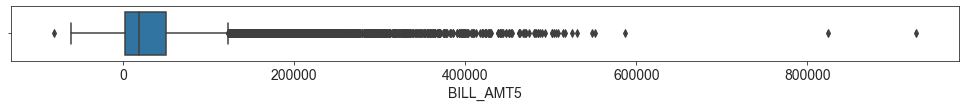

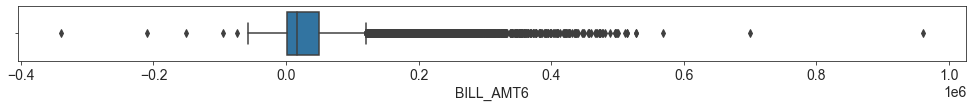

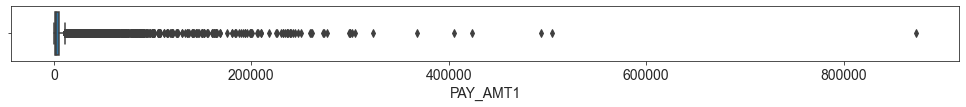

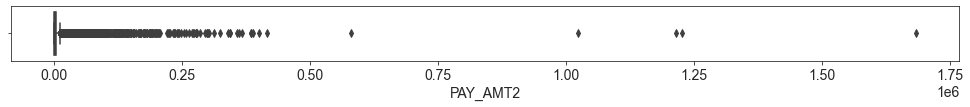

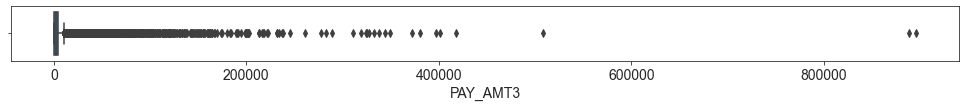

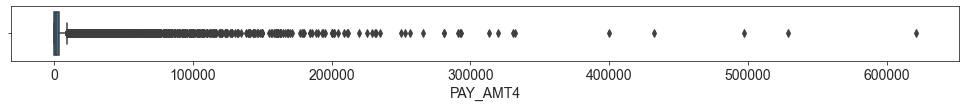

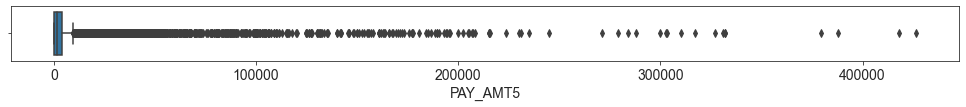

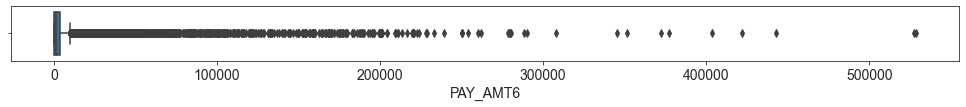

In [207]:
# Quick check boxplot for numerical variables
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in cols:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=credit, x=col)

Seems like numerical variables are skewed, including BILL_AMT1.

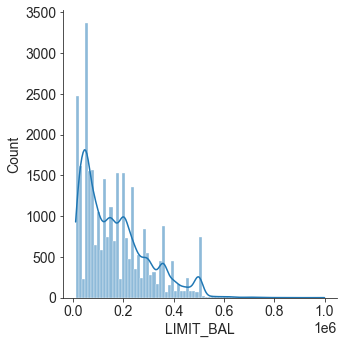

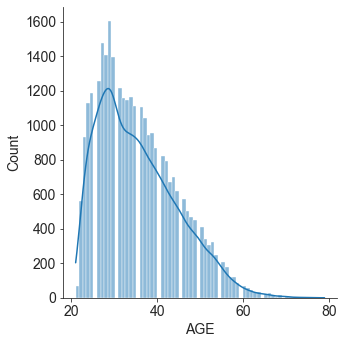

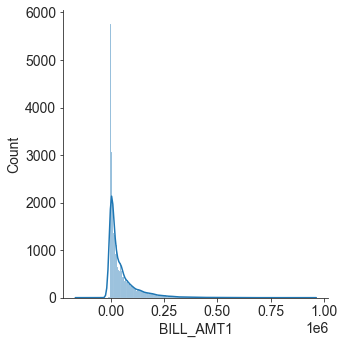

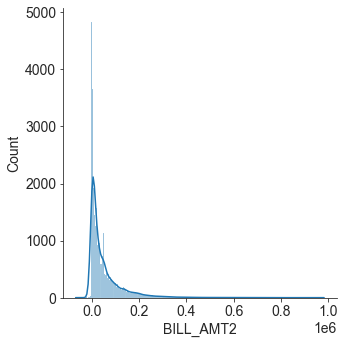

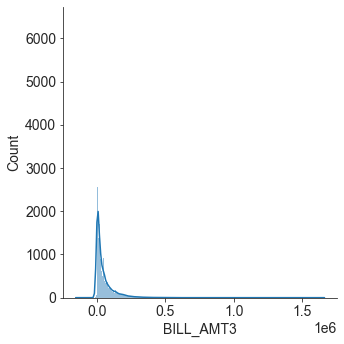

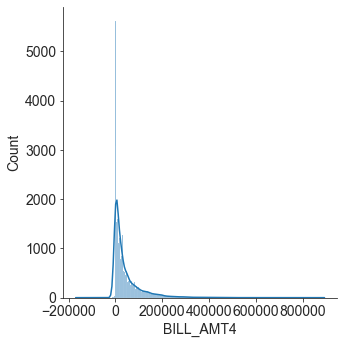

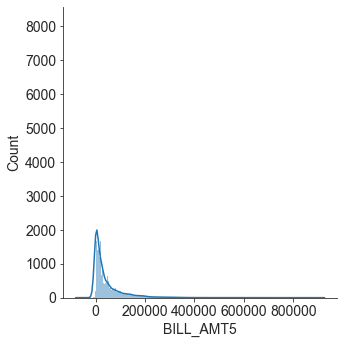

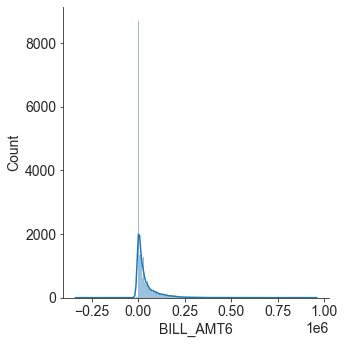

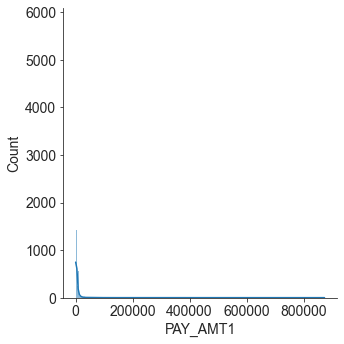

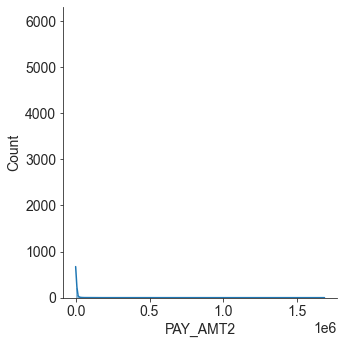

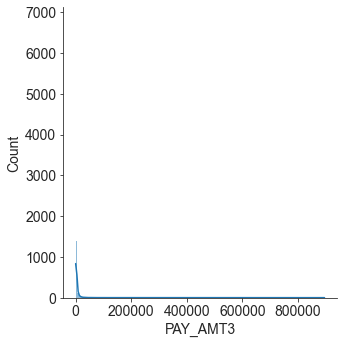

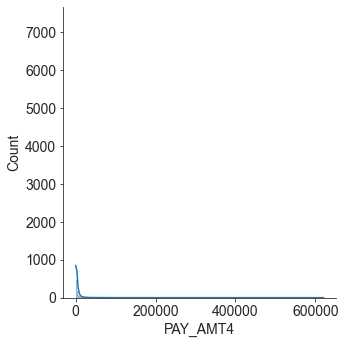

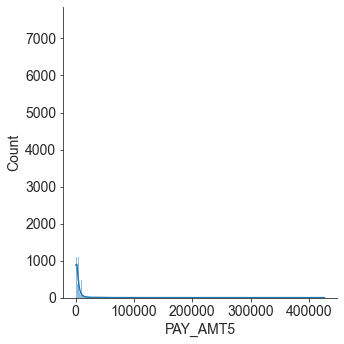

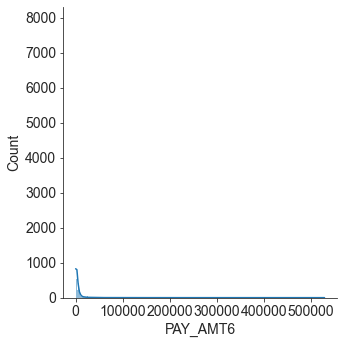

In [208]:
# Quick check histgram for numerical variables
# Use thsi to decide which scaler to use afterwards
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in cols: 
    sns.displot(data= credit, x= col, kde= True)

In [209]:
#below plot is not for answering questions, but for presentation

# credit['BILL_AMT2'].hist(by=credit['SEX'])
# sns.displot(data=credit, x='BILL_AMT2', col= 'SEX', common_bins=False, bins=50, color= '#8de5a1')
# plt.axis(xmin=0,xmax=500000)

In [210]:
#below plot is not for answering questions, but for presentation

# credit['BILL_AMT3'].hist(by=credit['SEX'])
# sns.displot(data=credit, x='BILL_AMT3', col= 'SEX', common_bins=False, bins=50, color= '#8de5a1')
# plt.axis(xmin=0,xmax=500000)

In [211]:
#below plot is not for answering questions, but for presentation

# credit['PAY_AMT1'].hist(by=credit['SEX'])
# sns.displot(data=credit, x='PAY_AMT1', col= 'SEX', common_bins=False, bins=30, color= '#d0bbff')
# plt.axis(xmin=0,xmax=500000)

In [212]:
#below plot is not for answering questions, but for presentation

# credit['PAY_AMT2'].hist(by=credit['SEX'])
# sns.displot(data=credit, x='PAY_AMT2', col= 'SEX', common_bins=False, bins=30, color= '#d0bbff')
# plt.axis(xmin=0,xmax=500000)

In [213]:
#below plot is not for answering questions, but for presentation

# credit['PAY_AMT3'].hist(by=credit['SEX'])
# sns.displot(data=credit, x='PAY_AMT3', col= 'SEX', common_bins=False, bins=30, color= '#d0bbff')
# plt.axis(xmin=0,xmax=500000)

## Does there appear to be any relationship between default and AGE?

Observations:
- Pearsons correlation is only 0.014, meaning no relationship
- The stacked bar plot shows that there is no correlation between AGE and Default
- The 3-way scatter plots also provide evidence that there appears no correlation between AGE and Default. Simply put, the plots show "no trend".

<AxesSubplot:xlabel='AGE', ylabel='Count'>

Text(0.5, 1.0, 'Customer Age Distribution')

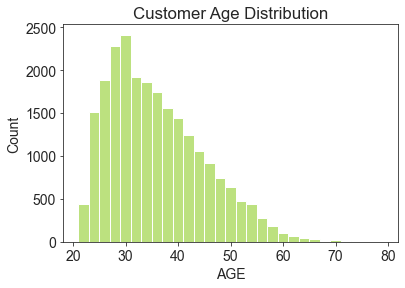

In [214]:
#check age distribution (including default and not default customers)
sns.histplot(x='AGE', data=credit[credit['Default']== 0], binwidth=2, label= 'Age Distribution', color= '#a6d854')
plt.title('Customer Age Distribution')

<AxesSubplot:xlabel='AGE', ylabel='Count'>

Text(0.5, 1.0, 'Default Customer Age Distribution')

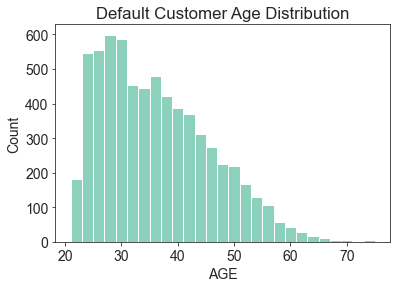

In [215]:
#check age distribution of default customers
sns.histplot(x='AGE', data=credit[credit['Default']== 1], binwidth=2, color= '#66c2a5')
plt.title('Default Customer Age Distribution')

In [216]:
#pearson correlation calculation
from scipy.stats import pearsonr
Age_1 = credit['AGE']
Default_1 = credit['Default']
 
# Apply the pearsonr()
corr, _ = pearsonr(Age_1, Default_1)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.014


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Default')

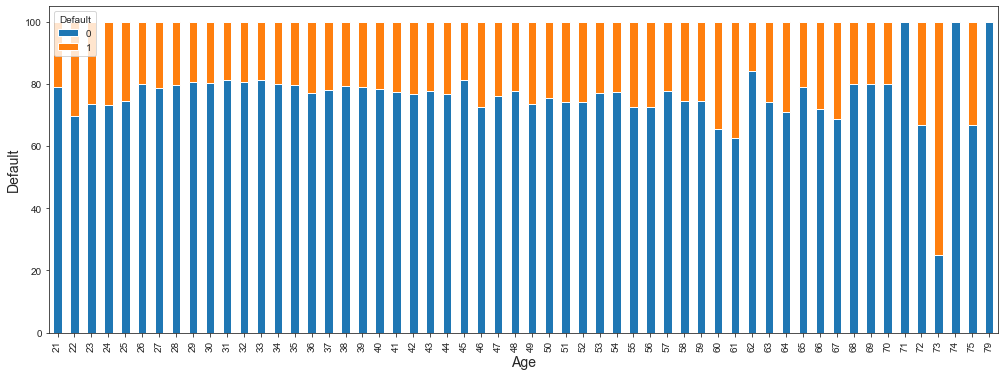

In [217]:
%matplotlib inline
table_default = pd.crosstab(credit['AGE'], credit['Default'])

# fig = plt.figure(figsize = (17,6))
table = (table_default.div(table_default.sum(axis= 1),axis = 0)*100).plot(
    kind='bar', stacked = True, figsize = (17,6))
legend_labels = ['0', '1']
plt.legend(labels = legend_labels, title = 'Default', loc = 'upper left')
plt.xlabel("Age",fontsize = 14)
plt.ylabel('Default',fontsize = 14)

<Figure size 864x576 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'AGE'),
  Text(1.5, 0, 'BILL_AMT1'),
  Text(2.5, 0, 'BILL_AMT2'),
  Text(3.5, 0, 'BILL_AMT3'),
  Text(4.5, 0, 'BILL_AMT4'),
  Text(5.5, 0, 'BILL_AMT5'),
  Text(6.5, 0, 'BILL_AMT6'),
  Text(7.5, 0, 'PAY_AMT1'),
  Text(8.5, 0, 'PAY_AMT2'),
  Text(9.5, 0, 'PAY_AMT3'),
  Text(10.5, 0, 'PAY_AMT4'),
  Text(11.5, 0, 'PAY_AMT5'),
  Text(12.5, 0, 'PAY_AMT6')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'AGE'),
  Text(0, 1.5, 'BILL_AMT1'),
  Text(0, 2.5, 'BILL_AMT2'),
  Text(0, 3.5, 'BILL_AMT3'),
  Text(0, 4.5, 'BILL_AMT4'),
  Text(0, 5.5, 'BILL_AMT5'),
  Text(0, 6.5, 'BILL_AMT6'),
  Text(0, 7.5, 'PAY_AMT1'),
  Text(0, 8.5, 'PAY_AMT2'),
  Text(0, 9.5, 'PAY_AMT3'),
  Text(0, 10.5, 'PAY_AMT4'),
  Text(0, 11.5, 'PAY_AMT5'),
  Text(0, 12.5, 'PAY_AMT6')])

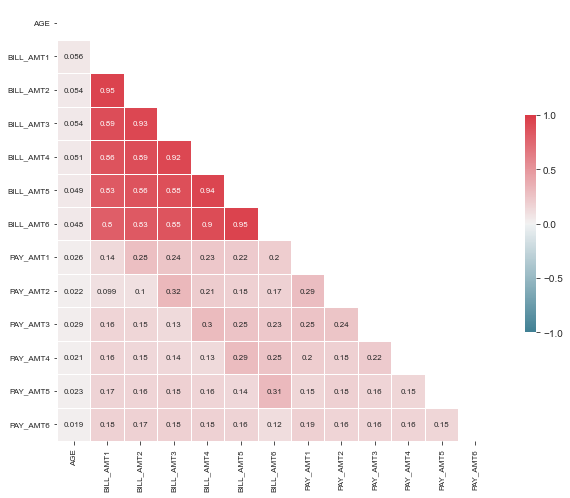

In [218]:
# check if there is any correlation between numeric variables

numeric = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(credit[numeric].corr(), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(credit[numeric].corr(), mask=mask, vmin=-1, vmax=1, 
                     square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 8}
                     )
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'LIMIT_BAL')

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'BILL_AMT1')

Text(0.5, 0, 'PAY_AMT1')

Text(0, 0.5, 'BILL_AMT1')

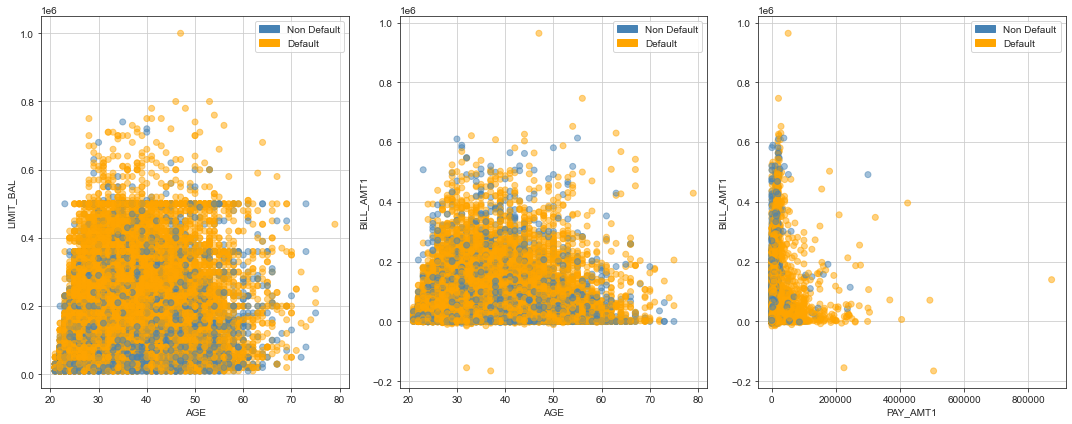

In [219]:
#distribution correlated features -- scatter interaction
import matplotlib.patches as mpatches

data_np=credit.to_numpy()
target=credit.Default

# variables to 
BILL_AMT1 = credit['BILL_AMT1'].to_numpy()
BILL_AMT2 = credit['BILL_AMT2'].to_numpy()
BILL_AMT3 = credit['BILL_AMT3'].to_numpy()
BILL_AMT4 = credit['BILL_AMT4'].to_numpy()
BILL_AMT5 = credit['BILL_AMT5'].to_numpy()
BILL_AMT6 = credit['BILL_AMT6'].to_numpy()
AGE       = credit['AGE'].to_numpy()
LIMIT_BAL = credit['LIMIT_BAL'].to_numpy()
PAY_AMT1  = credit['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
# pop_a = mpatches.Patch(color='steelblue', label='Non Default')
# pop_b = mpatches.Patch(color='crimson', label='Default')
# colors=['crimson', 'steelblue']

pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='orange', label='Default')
colors=['orange','steelblue']

ax[0].scatter(AGE, LIMIT_BAL, c=target, 
              cmap=matplotlib.colors.ListedColormap(colors), 
              label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, 
              cmap=matplotlib.colors.ListedColormap(colors), 
              alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, 
              cmap=matplotlib.colors.ListedColormap(colors), 
              alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

# kNN Model


## Build a model of default using kNN. Randomly partition the data into a training set (70%) and a validation set (30%). What value of k did you decide to use and why?

We choose k= 12, because according to the "Accuracy of Different K Plot", K= 12 is the best since before K= 12, accuracy continues to increse while after K= 12, the curve starts to level out.

In [220]:
#encode categorical variables
#here sex, education, marriage, pay_1, pay_2, ....... , pay_6 should be treated as categorical variables, then create dummy variables
#use get_dummies or OneHotEncoder()

In [221]:
from sklearn.preprocessing import OneHotEncoder
#Create an instance of One-hot-encoder
enc=OneHotEncoder(drop= 'first')

#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
have huge  number of categorical variables
'''
enc_cat=pd.DataFrame(enc.fit_transform(credit[['SEX','EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]).toarray())
  
enc_cat

'\nNOTE: we have converted the enc.fit_transform() method to array because the fit_transform method \nof OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we \nhave huge  number of categorical variables\n'

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
#normalize numeric variables, we use MinMaxScaler to scale variables within 0 and 1 
from sklearn. preprocessing import MinMaxScaler
MMS= MinMaxScaler()
enc_num= pd.DataFrame(MMS.fit_transform(credit[cols]),columns= cols )

In [223]:
#join encoded categorical and numeric variables together
enc_credit= enc_cat.join(enc_num)

In [224]:
enc_credit.shape

(30000, 82)

In [225]:
#Train Test data Split
from sklearn.model_selection import train_test_split
X= enc_credit.values  
y = credit['Default']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (21000, 82) (21000,)
Test set: (9000, 82) (9000,)


In [226]:
#check clusters from 1 to 60
Ks = 61                     # will test k = 1 to 56, but range() does not count the last element --> choose ks = 61
mean_acc = np.zeros((Ks-1))   # gen an array of 60 zeros
std_acc = np.zeros((Ks-1))    # gen an array of 60 zeros
ConfustionMx = [];            # a semicolon does nothing here

# Note: sklearn.metrics have many functions available which will output different metrics like accuracy, precision, recall etc.
for n in range(1,Ks):         # n = 1,2,3,..,60
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)  # use K-NN to train the model
    yhat=neigh.predict(X_test)                                          # predict yhat using the test_set
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)                # accuracy evaluation using classification accuracy_score()  
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])          # in numpy: Y.shape[0] is n. This formula: std = sqrt(variance/n)
    
mean_acc

array([0.73      , 0.784     , 0.77522222, 0.79533333, 0.79655556,
       0.80366667, 0.80033333, 0.80722222, 0.80677778, 0.80977778,
       0.80977778, 0.81077778, 0.81155556, 0.81255556, 0.81177778,
       0.81088889, 0.81144444, 0.81188889, 0.81144444, 0.81322222,
       0.81277778, 0.81266667, 0.81211111, 0.813     , 0.81222222,
       0.81322222, 0.81222222, 0.81344444, 0.81266667, 0.81366667,
       0.81377778, 0.81355556, 0.81277778, 0.81366667, 0.81377778,
       0.81466667, 0.81444444, 0.81444444, 0.81388889, 0.81466667,
       0.815     , 0.81477778, 0.81422222, 0.81433333, 0.81433333,
       0.81377778, 0.81344444, 0.81366667, 0.81355556, 0.81388889,
       0.81355556, 0.81322222, 0.81333333, 0.81266667, 0.81333333,
       0.81233333, 0.81366667, 0.81277778, 0.81233333, 0.812     ])

Text(0, 0.5, 'Accuracy ')

Text(0.5, 0, 'Number of Nabors (K)')

Text(0.5, 1.0, 'Accuracy of Different Nabors(K)')

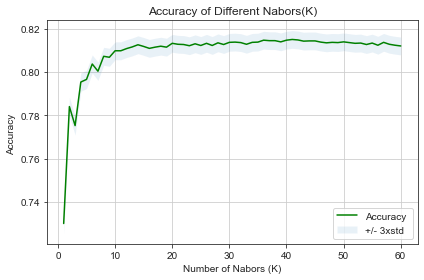

In [227]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')     # 'g' is green
plt.fill_between(range(1,Ks), 
                 mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, 
                 alpha=0.10)           # alpha is the color of the band
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.title('Accuracy of Different Nabors(K)')
plt.tight_layout()                     # Automatically adjust subplot parameters to give specified padding
plt.grid()
plt.show()

In [228]:
# let's use k=12
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=12)

In [229]:
yhat_knn = neigh.predict(X_test)

## Score the validation data (predict) using the model. Produce a confusion table and an ROC for the scored validation data

In [230]:
print("K nearest neighbor:")
print(classification_report(y_test, yhat_knn))

K nearest neighbor:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6969
           1       0.68      0.31      0.42      2031

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



In [231]:
# True Negative (Top-Left Quadrant)
# False Positive (Top-Right Quadrant)
# False Negative (Bottom-Left Quadrant)
# True Positive (Bottom-Right Quadrant)
ct = confusion_matrix(y_test, yhat_knn)
TP = ct[1,1]
TN = ct[0,0]
FP = ct[0,1]
FN = ct[1,0]
total = TP + TN + FP + FN
print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)

True Positive (TP) =  623
True Negative (TN) =  6674
False Positive (FP) =  295
False Negative (FN) =  1408


<AxesSubplot:>

Text(0.5, 1.0, 'Confusion table for kNN')

Text(0.5, 16.0, 'Predicted')

Text(34.0, 0.5, 'Actual')

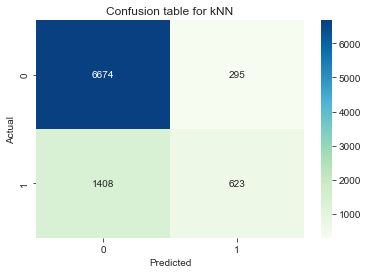

In [232]:
sns.heatmap(confusion_matrix(y_test, yhat_knn), annot = True, fmt = 'd', cmap='GnBu')
plt.title("Confusion table for kNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC of KNN')

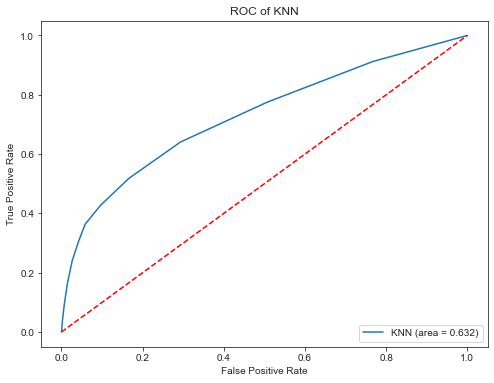

In [233]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, yhat_knn)
fpr, tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='KNN (area = %0.3f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of KNN')
plt.legend(loc="lower right")
# plt.savefig('knn_roc_auc')
plt.show()

## From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

In [234]:
Accuracy_knn = metrics.accuracy_score(y_test, yhat_knn)
print('Accuracy:',Accuracy_knn)
Precision_knn = metrics.precision_score(y_test, yhat_knn)
print('Precision:',Precision_knn)
Misclassification_rate_knn= (FP + FN) / total
print('Misclassification:', Misclassification_rate_knn)
true_positive_knn = TP/ (TP+FN)
print('True Positive:', true_positive_knn)
false_positive_knn = FP/ (FP+ TN)
print('False Positive:', false_positive_knn)
specificity_knn = TN / (TN + FP)
print('Specificity:', specificity_knn)
prevalence_knn = (FN + TP) / total
print('Prevalence:', prevalence_knn)

Accuracy: 0.8107777777777778
Precision: 0.6786492374727668
Misclassification: 0.18922222222222224
True Positive: 0.3067454455933038
False Positive: 0.04233031998852059
Specificity: 0.9576696800114795
Prevalence: 0.22566666666666665


##  Use k-means clustering to segment the customers on AGE. What value of k did you decide to use and why?

It seems k is equal to 4 or 5 returns the optimal (low) Inertial score using elbow plot of K-means. After 5, there is no significant drop in Inertial score. Since our sample is small (30000 observations). I would choose the numer of clusters K equals to 4.

array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.00161031, 0.        ,
        0.00378311],
       [1.        , 0.        , 1.        , ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.        , 0.        , 1.        , ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.        , 0.        , 0.        , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.        , 0.        , 1.        , ..., 0.00161031, 0.00234451,
        0.00189155]])

The intertia for : 2 Clusters is:  232.41125378173945
The intertia for : 3 Clusters is:  112.62225644093498
The intertia for : 4 Clusters is:  68.40144445848495
The intertia for : 5 Clusters is:  47.76878225432723
The intertia for : 6 Clusters is:  33.39090438055951
The intertia for : 7 Clusters is:  24.768294914267205
The intertia for : 8 Clusters is:  19.300517647937795
The intertia for : 9 Clusters is:  15.00180853084299
The intertia for : 10 Clusters is:  12.492359801318417
The intertia for : 11 Clusters is:  9.97455339969965
The intertia for : 12 Clusters is:  8.93225939874032
The intertia for : 13 Clusters is:  7.332615885328826
The intertia for : 14 Clusters is:  6.3790490914061495
The intertia for : 15 Clusters is:  5.697962004518009
The intertia for : 16 Clusters is:  4.721703937594123
The intertia for : 17 Clusters is:  4.323340225341577
The intertia for : 18 Clusters is:  3.629413190288065
The intertia for : 19 Clusters is:  3.7025388683258558


[Text(0, 0, '2'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '7'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '11'),
 Text(10, 0, '12'),
 Text(11, 0, '13'),
 Text(12, 0, '14'),
 Text(13, 0, '15'),
 Text(14, 0, '16'),
 Text(15, 0, '17'),
 Text(16, 0, '18'),
 Text(17, 0, '19')]

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia Score')

Text(0.5, 1.0, 'Inertia Plot per K')

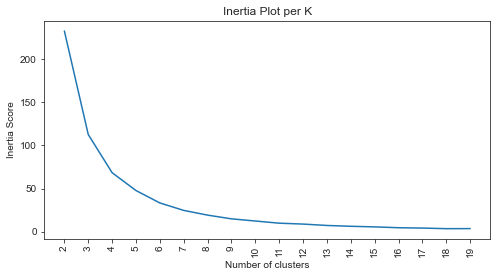

In [235]:
#We used SSE here,can also use Silhouette Coefficient to choose the best K
no_clusters = range(2,20)
inertia = []

X1 = enc_credit.loc[:,['AGE']]
X1 = np.nan_to_num(X1)
age_dataSet = MinMaxScaler().fit_transform(X)
age_dataSet

for f in no_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X1)
    u = kmeans.inertia_
    inertia.append(u)
    print("The intertia for :", f, "Clusters is: ", u)

# Create  the plot for inertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(8,4))
ax = np.arange(len(no_clusters))
ax1.plot(ax, inertia)
ax1.set_xticks(ax)
ax1.set_xticklabels(no_clusters, rotation='vertical')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per K")

## Build a model of default using kNN for each segment. Randomly partition the data into a training set (70%) and a validation set (30%) for each segment. What value of k did you decide to use and why?

In [236]:
clusterNum = 4               # Use 4 clusters
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X1)
labels = k_means.labels_     # KEY POINT: unsupervised learning requires us to label each point
print(labels)

KMeans(n_clusters=4, n_init=12)

[1 1 0 ... 0 3 3]


We assign the labels to each row in dataframe.

In [237]:
enc_credit["Clus_km"] = labels
enc_credit.head(5)

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Clus_km
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,2


We can easily check the centroid values by averaging the features in each cluster.

In [238]:
enc_credit.groupby('Clus_km').mean()

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,0.594668,0.399708,0.469569,0.116549,0.003262,0.009787,0.000675,0.503206,0.488244,0.006412,...,0.113672,0.203727,0.123636,0.293054,0.007024,0.003907,0.006551,0.008730,0.012523,0.011514
1,0.651140,0.390811,0.496504,0.098157,0.005267,0.008354,0.000636,0.170798,0.824117,0.003995,...,0.109396,0.196491,0.116307,0.287800,0.005633,0.002933,0.004822,0.006595,0.009832,0.008215
2,0.530017,0.234853,0.386882,0.360200,0.002779,0.009172,0.005837,0.742913,0.224847,0.030017,...,0.113737,0.202468,0.121696,0.291775,0.006299,0.003368,0.005830,0.007360,0.011004,0.008849
3,0.576615,0.289692,0.460923,0.231385,0.004000,0.010462,0.002615,0.712615,0.267538,0.017538,...,0.113887,0.203595,0.123205,0.292496,0.007288,0.004049,0.006562,0.008681,0.012058,0.010969


### Segment #1

In [239]:
enc_credit= enc_credit.join(credit['Default'])

In [240]:
credit_0 = enc_credit.loc[enc_credit['Clus_km']==0]
credit_0

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Clus_km,Default
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.100102,0.276367,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513,0,0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.093545,0.271670,0.000000,0.000000,0.000000,0.020945,0.002631,0.000000,0,0
10,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.082461,0.263846,0.002640,0.000007,0.000056,0.000483,0.008764,0.000125,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.080648,0.260979,0.010365,0.000000,0.000874,0.000000,0.000000,0.000000,0,0
29991,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083127,0.262900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
29993,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.149535,0.303248,0.002290,0.066370,0.004464,0.004831,0.004689,0.003783,0,0
29994,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.162558,0.323347,0.008013,0.002078,0.000000,0.011272,0.000000,0.007566,0,1


In [241]:
# Get Segment #1
credit_0 = enc_credit.loc[enc_credit['Clus_km']==0]

# make X and Y datasets
X0 = credit_0.iloc[:, :-2]
y0 = credit_0['Default']

# Normalize data, enc_credit is already normalized version, so we don't need to do it again
# X0 = preprocessing.StandardScaler().fit(X0).transform(X0.astype(float))

# split data
X_train0, X_test0, y_train0, y_test0 = train_test_split( X0, y0, test_size=0.3, random_state=4)
print ('Train set:', X_train0.shape,  y_train0.shape)
print ('Test set:', X_test0.shape,  y_test0.shape)

# let's use k=12, we chose 12 for the non-segmented KNN model
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train0,y_train0)

yhat0 = neigh.predict(X_test0)
yhat0

Train set: (6222, 82) (6222,)
Test set: (2667, 82) (2667,)


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [242]:
from sklearn.metrics import confusion_matrix

In [243]:
confusion_matrix(y_test0, yhat0)

array([[2082,   69],
       [ 395,  121]], dtype=int64)

In [244]:
ct0 = confusion_matrix(y_test0, yhat0)
TP = ct0[1,1]
TN = ct0[0,0]
FP = ct0[0,1]
FN = ct0[1,0]
total = TP + TN + FP + FN
print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)

True Positive (TP) =  121
True Negative (TN) =  2082
False Positive (FP) =  69
False Negative (FN) =  395


<AxesSubplot:>

Text(0.5, 1.0, 'Confusion table for kNN (Segment 1)')

Text(0.5, 16.0, 'Predicted')

Text(34.0, 0.5, 'Actual')

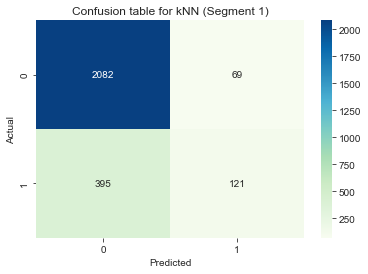

In [246]:
sns.heatmap(confusion_matrix(y_test0, yhat0), annot = True, fmt = 'd', cmap='GnBu')
plt.title("Confusion table for kNN (Segment 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve of Segment 1')

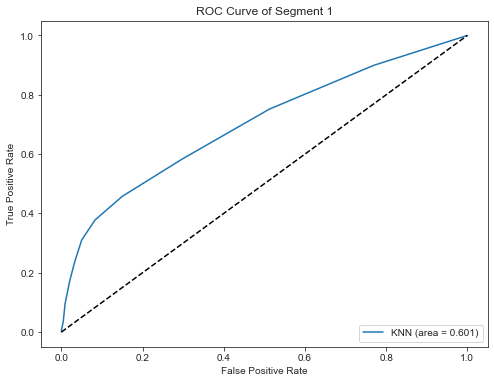

In [247]:
knn_0_roc_auc = roc_auc_score(y_test0, neigh.predict(X_test0))
fpr, tpr, thresholds = roc_curve(y_test0, neigh.predict_proba(X_test0)[:,1])
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='KNN (area = %0.3f)' % knn_0_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Segment 1')
plt.legend(loc="lower right")
# plt.savefig('knn_0_roc_auc')
plt.show()

In [245]:
Accuracy0 = metrics.accuracy_score(y_test0, yhat0)
print('Accuracy:',Accuracy0)
Precision0 = metrics.precision_score(y_test0, yhat0)
print('Precision:',Precision0)
Misclassification_rate0= (FP + FN) / total
print('Misclassification:', Misclassification_rate0)
true_positive0 = TP/ (TP+FN)
print('True Positive:', true_positive0)
false_positive0 = FP/ (FP+ TN)
print('False Positive:', false_positive0)
specificity0 = TN / (TN + FP)
print('Specificity:', specificity0)
prevalence0 = (FN + TP) / total
print('Prevalence:', prevalence0)

Accuracy: 0.8260217472815898
Precision: 0.6368421052631579
Misclassification: 0.1739782527184102
True Positive: 0.23449612403100775
False Positive: 0.03207810320781032
Specificity: 0.9679218967921897
Prevalence: 0.19347581552305962


### Segment 2

In [248]:
# Get Segment #2
credit_1 = enc_credit.loc[enc_credit['Clus_km']==1]

# make X and Y datasets
X1 = credit_1.iloc[:, :-2]
y1 = credit_1['Default'].values

# split data
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.3, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

# let's use k=12
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train1)

yhat1 = neigh.predict(X_test1)
yhat1

Train set: (7709, 82) (7709,)
Test set: (3304, 82) (3304,)


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [249]:
ct1 = confusion_matrix(y_test1, yhat1)
TP = ct1[1,1]
TN = ct1[0,0]
FP = ct1[0,1]
FN = ct1[1,0]
total = TP + TN + FP + FN
print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)

True Positive (TP) =  231
True Negative (TN) =  2439
False Positive (FP) =  124
False Negative (FN) =  510


<AxesSubplot:>

Text(0.5, 1.0, 'Confusion table for kNN (Segment 2)')

Text(0.5, 16.0, 'Predicted')

Text(34.0, 0.5, 'Actual')

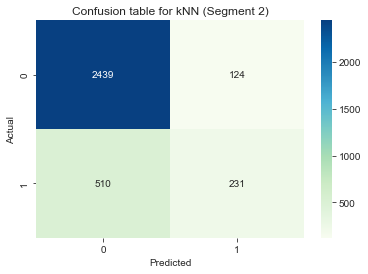

In [250]:
sns.heatmap(confusion_matrix(y_test1, yhat1), annot = True, fmt = 'd', cmap='GnBu')
plt.title("Confusion table for kNN (Segment 2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve of Segment 2')

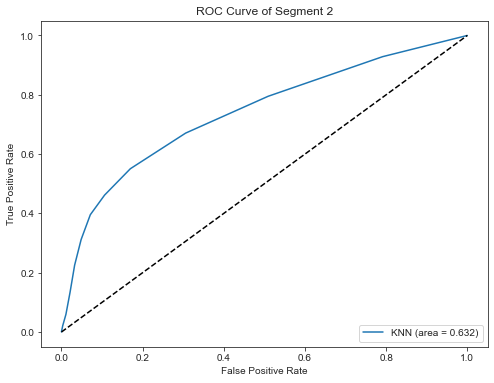

In [251]:
knn_1_roc_auc = roc_auc_score(y_test1, neigh.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, neigh.predict_proba(X_test1)[:,1])
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='KNN (area = %0.3f)' % knn_1_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Segment 2')
plt.legend(loc="lower right")
# plt.savefig('knn_1_roc_auc')
plt.show()

In [252]:
Accuracy1 = metrics.accuracy_score(y_test1, yhat1)
print('Accuracy:',Accuracy1)
Precision1 = metrics.precision_score(y_test1, yhat1)
print('Precision:',Precision1)
Misclassification_rate1= (FP + FN) / total
print('Misclassification:', Misclassification_rate1)
true_positive1 = TP/ (TP+FN)
print('True Positive:', true_positive1)
false_positive1 = FP/ (FP+ TN)
print('False Positive:', false_positive1)
specificity1 = TN / (TN + FP)
print('Specificity:', specificity1)
prevalence1 = (FN + TP) / total
print('Prevalence:', prevalence1)

Accuracy: 0.8081113801452785
Precision: 0.6507042253521127
Misclassification: 0.19188861985472155
True Positive: 0.3117408906882591
False Positive: 0.048380803745610615
Specificity: 0.9516191962543894
Prevalence: 0.22427360774818403


### Segment 3

In [253]:
# Get Segment #3
credit_2 = enc_credit.loc[enc_credit['Clus_km']==2]

# make X and Y datasets
X2 = credit_2.iloc[:, :-2]
y2 = credit_2['Default'].values

# split data
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.3, random_state=4)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

# let's use k=12
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train2,y_train2)

yhat2 = neigh.predict(X_test2)

Train set: (2518, 82) (2518,)
Test set: (1080, 82) (1080,)


In [254]:
ct2 = confusion_matrix(y_test2, yhat2)
TP = ct2[1,1]
TN = ct2[0,0]
FP = ct2[0,1]
FN = ct2[1,0]
total = TP + TN + FP + FN
print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)

True Positive (TP) =  74
True Negative (TN) =  758
False Positive (FP) =  35
False Negative (FN) =  213


<AxesSubplot:>

Text(0.5, 1.0, 'Confusion table for kNN (Segment 3)')

Text(0.5, 16.0, 'Predicted')

Text(34.0, 0.5, 'Actual')

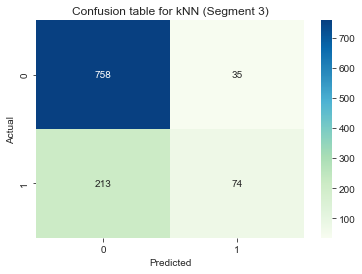

In [255]:
sns.heatmap(confusion_matrix(y_test2, yhat2), annot = True, fmt = 'd', cmap='GnBu')
plt.title("Confusion table for kNN (Segment 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve of Segment 3')

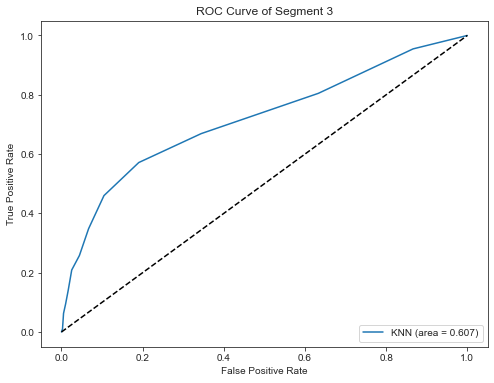

In [256]:
knn_2_roc_auc = roc_auc_score(y_test2, neigh.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, neigh.predict_proba(X_test2)[:,1])
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='KNN (area = %0.3f)' % knn_2_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Segment 3')
plt.legend(loc="lower right")
# plt.savefig('knn_2_roc_auc')
plt.show()

In [257]:
Accuracy2 = metrics.accuracy_score(y_test2, yhat2)
print('Accuracy:',Accuracy2)
Precision2 = metrics.precision_score(y_test2, yhat2)
print('Precision:',Precision2)
Misclassification_rate2= (FP + FN) / total
print('Misclassification:', Misclassification_rate2)
true_positive2 = TP/ (TP+FN)
print('True Positive:', true_positive2)
false_positive2 = FP/ (FP+ TN)
print('False Positive:', false_positive2)
specificity2 = TN / (TN + FP)
print('Specificity:', specificity2)
prevalence2 = (FN + TP) / total
print('Prevalence:', prevalence2)

Accuracy: 0.7703703703703704
Precision: 0.6788990825688074
Misclassification: 0.22962962962962963
True Positive: 0.2578397212543554
False Positive: 0.044136191677175286
Specificity: 0.9558638083228247
Prevalence: 0.2657407407407407


### Segment 4

In [258]:
# Get Segment #4
credit_3 = enc_credit.loc[enc_credit['Clus_km']==3]

# make X and Y datasets
X3 = credit_3.iloc[:, :-2]
y3 = credit_3['Default'].values

# split data
X_train3, X_test3, y_train3, y_test3 = train_test_split( X3, y3, test_size=0.3, random_state=4)
print ('Train set:', X_train3.shape,  y_train3.shape)
print ('Test set:', X_test3.shape,  y_test3.shape)

# let's use k=12
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train3,y_train3)

yhat3 = neigh.predict(X_test3)
yhat3

Train set: (4550, 82) (4550,)
Test set: (1950, 82) (1950,)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [259]:
ct3 = confusion_matrix(y_test3, yhat3)
TP = ct3[1,1]
TN = ct3[0,0]
FP = ct3[0,1]
FN = ct3[1,0]
total = TP + TN + FP + FN
print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)

True Positive (TP) =  126
True Negative (TN) =  1448
False Positive (FP) =  68
False Negative (FN) =  308


<AxesSubplot:>

Text(0.5, 1.0, 'Confusion table for kNN (Segment 4)')

Text(0.5, 16.0, 'Predicted')

Text(34.0, 0.5, 'Actual')

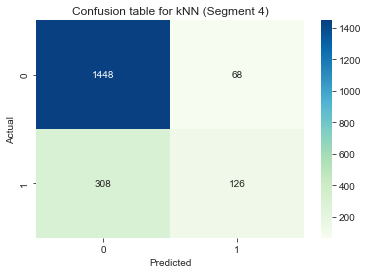

In [260]:
sns.heatmap(confusion_matrix(y_test3, yhat3), annot = True, fmt = 'd', cmap='GnBu')
plt.title("Confusion table for kNN (Segment 4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve of Segment 4')

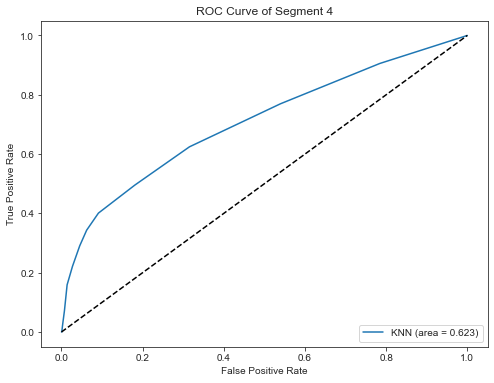

In [261]:
knn_3_roc_auc = roc_auc_score(y_test3, neigh.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test3, neigh.predict_proba(X_test3)[:,1])
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='KNN (area = %0.3f)' % knn_3_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Segment 4')
plt.legend(loc="lower right")
# plt.savefig('knn_3_roc_auc')
plt.show()

In [262]:
Accuracy3 = metrics.accuracy_score(y_test3, yhat3)
print('Accuracy:',Accuracy3)
Precision3 = metrics.precision_score(y_test3, yhat3)
print('Precision:',Precision3)
Misclassification_rate3= (FP + FN) / total
print('Misclassification:', Misclassification_rate3)
true_positive3 = TP/ (TP+FN)
print('True Positive:', true_positive3)
false_positive3 = FP/ (FP+ TN)
print('False Positive:', false_positive3)
specificity3 = TN / (TN + FP)
print('Specificity:', specificity3)
prevalence3 = (FN + TP) / total
print('Prevalence:', prevalence3)

Accuracy: 0.8071794871794872
Precision: 0.6494845360824743
Misclassification: 0.19282051282051282
True Positive: 0.2903225806451613
False Positive: 0.044854881266490766
Specificity: 0.9551451187335093
Prevalence: 0.22256410256410256


##  Q3.9 Do any of the models built on the AGE segments have a better classification performance than the non-segmented population model? How much better or worse?

Regarding the ability to predict(AUC), the non-segmented KNN model is better than other non-segmented models; while when it comes to accuracy rate, segment 1 KNN model is the best with 82.60% accuracy, 81.08% for non-segmented KNN, 1.52 percentage higher. 

In [263]:
metrics1 = {"Segment 1": {
'Accuracy':Accuracy0 ,
'Precision': Precision0,
'Misclassification':Misclassification_rate0 ,
'True Positive': true_positive0,
'False Positive': false_positive0,
'Specificity': specificity0,
'Prevalence':prevalence0 ,
'AUC':knn_0_roc_auc
    }
          }

metrics1["Segment 1"]

{'Accuracy': 0.8260217472815898,
 'Precision': 0.6368421052631579,
 'Misclassification': 0.1739782527184102,
 'True Positive': 0.23449612403100775,
 'False Positive': 0.03207810320781032,
 'Specificity': 0.9679218967921897,
 'Prevalence': 0.19347581552305962,
 'AUC': 0.6012090104115987}

In [264]:
metrics2 = {"Segment 2": {
'Accuracy':Accuracy1 ,
'Precision': Precision1,
'Misclassification':Misclassification_rate1 ,
'True Positive': true_positive1,
'False Positive': false_positive1,
'Specificity': specificity1,
'Prevalence':prevalence1 ,
'AUC':knn_1_roc_auc
    }
          }

metrics2["Segment 2"]

{'Accuracy': 0.8081113801452785,
 'Precision': 0.6507042253521127,
 'Misclassification': 0.19188861985472155,
 'True Positive': 0.3117408906882591,
 'False Positive': 0.048380803745610615,
 'Specificity': 0.9516191962543894,
 'Prevalence': 0.22427360774818403,
 'AUC': 0.6316800434713242}

In [265]:
metrics3 = {"Segment 3": {
'Accuracy':Accuracy2 ,
'Precision': Precision2,
'Misclassification':Misclassification_rate2 ,
'True Positive': true_positive2,
'False Positive': false_positive2,
'Specificity': specificity2,
'Prevalence':prevalence2 ,
'AUC':knn_2_roc_auc
    }
          }

metrics3["Segment 3"]

{'Accuracy': 0.7703703703703704,
 'Precision': 0.6788990825688074,
 'Misclassification': 0.22962962962962963,
 'True Positive': 0.2578397212543554,
 'False Positive': 0.044136191677175286,
 'Specificity': 0.9558638083228247,
 'Prevalence': 0.2657407407407407,
 'AUC': 0.6068517647885902}

In [266]:
metrics4 = {"Segment 4": {
'Accuracy':Accuracy3 ,
'Precision': Precision3,
'Misclassification':Misclassification_rate3 ,
'True Positive': true_positive3,
'False Positive': false_positive3,
'Specificity': specificity3,
'Prevalence':prevalence3 ,
'AUC':knn_3_roc_auc
    }
          }

metrics4["Segment 4"]

{'Accuracy': 0.8071794871794872,
 'Precision': 0.6494845360824743,
 'Misclassification': 0.19282051282051282,
 'True Positive': 0.2903225806451613,
 'False Positive': 0.044854881266490766,
 'Specificity': 0.9551451187335093,
 'Prevalence': 0.22256410256410256,
 'AUC': 0.6227338496893352}

In [267]:
# the non-segmented population model
metrics5 = {"KNN": {
    "Accuracy": Accuracy_knn,
    "Misclassification": Misclassification_rate_knn,
    "True Positive": true_positive_knn,
    "False Positive": false_positive_knn,
    "Specificity": specificity_knn,
    "Precision": Precision_knn,
    "Prevalence": prevalence_knn,
    "AUC": knn_roc_auc,
}
          }

metrics5["KNN"]

{'Accuracy': 0.8107777777777778,
 'Misclassification': 0.18922222222222224,
 'True Positive': 0.3067454455933038,
 'False Positive': 0.04233031998852059,
 'Specificity': 0.9576696800114795,
 'Precision': 0.6786492374727668,
 'Prevalence': 0.22566666666666665,
 'AUC': 0.6322075628023917}

In [268]:
df1 = pd.DataFrame(metrics1)
df2 = pd.DataFrame(metrics2)
df3 = pd.DataFrame(metrics3)
df4 = pd.DataFrame(metrics4)
df5 = pd.DataFrame(metrics5)

In [269]:
compare_metrics = pd.concat([df1, df2, df3, df4, df5], axis=1)
compare_metrics

compare_metrics.reindex(['Accuracy','Misclassification','True Positive','False Positive','Specificity','Precision', 'Prevalence', "AUC"])

,Segment 1,Segment 2,Segment 3,Segment 4,KNN
AUC,0.601209,0.631680,0.606852,0.622734,0.632208
Accuracy,0.826022,0.808111,0.770370,0.807179,0.810778
False Positive,0.032078,0.048381,0.044136,0.044855,0.042330
Misclassification,0.173978,0.191889,0.229630,0.192821,0.189222
Precision,0.636842,0.650704,0.678899,0.649485,0.678649
Prevalence,0.193476,0.224274,0.265741,0.222564,0.225667
Specificity,0.967922,0.951619,0.955864,0.955145,0.957670
True Positive,0.234496,0.311741,0.257840,0.290323,0.306745


,Segment 1,Segment 2,Segment 3,Segment 4,KNN
Accuracy,0.826022,0.808111,0.770370,0.807179,0.810778
Misclassification,0.173978,0.191889,0.229630,0.192821,0.189222
True Positive,0.234496,0.311741,0.257840,0.290323,0.306745
False Positive,0.032078,0.048381,0.044136,0.044855,0.042330
Specificity,0.967922,0.951619,0.955864,0.955145,0.957670
Precision,0.636842,0.650704,0.678899,0.649485,0.678649
Prevalence,0.193476,0.224274,0.265741,0.222564,0.225667
AUC,0.601209,0.631680,0.606852,0.622734,0.632208


# Neural Network Model

##  Build a model of default using ANN. Randomly partition the data into a training set (70%) and a validation set (30%). 

In [270]:
# # install tensorflow if you did not - It may take a long time
# !pip install --user tensorflow


#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
annmodel = ann.fit(X_train, y_train, batch_size=32, epochs = 100)



Epoch 1/100
657/657 [==============================] - 2s 1ms/step - loss: 0.4841 - accuracy: 0.7800
Epoch 2/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4455 - accuracy: 0.8085
Epoch 3/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4406 - accuracy: 0.8198
Epoch 4/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4379 - accuracy: 0.8210
Epoch 5/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4361 - accuracy: 0.8207
Epoch 6/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4348 - accuracy: 0.8224
Epoch 7/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.8221
Epoch 8/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8225
Epoch 9/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4319 - accuracy: 0.8221
Epoch 10/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4310 - accura

In [271]:
# You have to create a folder named "saved-model" at the same director of this python code
# save the model
from keras.models import model_from_json

# serialize model to JSON
model_json = ann.to_json()
with open("saved-model/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
ann.save_weights("saved-model/model.h5")
print("Saved model to disk")

1554

Saved model to disk


In [272]:
# Load the model

# load json and create model
json_file = open('saved-model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved-model/model.h5")
print("Loaded model from disk")

# compile loaded model
loaded_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Loaded model from disk


In [273]:
# make predictions

# Predict the Test set results
yhat_ann = loaded_model.predict(X_test) # gives probability of defaulting next month

yhat_ann = (yhat_ann > 0.5) # choose threshold to convert to true or false

282/282 [==============================] - 0s 933us/step


## Score the validation data (predict) using the model. Produce a confusion table and an ROC for the scored validation data. 

In [274]:
# Make the Confusion Matrix to evaluate
ct = confusion_matrix(y_test, yhat_ann)
TP = ct[0,0]
TN = ct[1,1]
FP = ct[0,1]
FN = ct[1,0]
total = TP + TN + FP + FN
print('True Positive (TP) = ', TP)
print('True Negative (TN) = ', TN)
print('False Positive (FP) = ', FP)
print('False Negative (FN) = ', FN)

True Positive (TP) =  6623
True Negative (TN) =  737
False Positive (FP) =  346
False Negative (FN) =  1294


<AxesSubplot:>

Text(0.5, 1.0, 'Confusion table for ANN')

Text(0.5, 16.0, 'Predicted')

Text(34.0, 0.5, 'Actual')

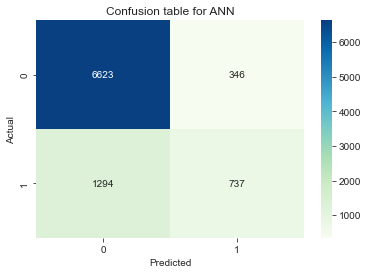

In [275]:
sns.heatmap(confusion_matrix(y_test, yhat_ann), annot = True, fmt = 'd', cmap='GnBu')
plt.title("Confusion table for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

282/282 [==============================] - 0s 938us/step


<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'ROC curve for ANN')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

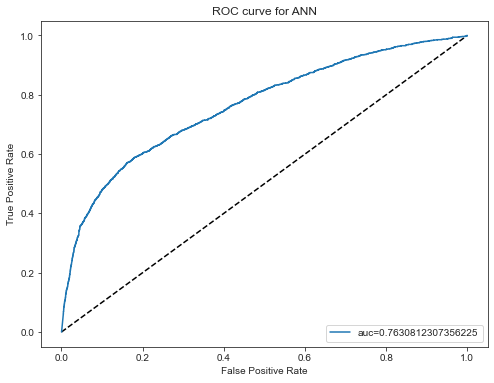

In [276]:
preds = loaded_model.predict(X_test)
ann_roc_auc = roc_auc_score(y_test, preds)

fpr, tpr, thresholds = roc_curve(y_test, preds)
auc = metrics.roc_auc_score(y_test, preds)

plt.figure(figsize=(8,6))
plt.plot([0,1], [0,1], 'k--' )
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC curve for ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

##  From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

In [277]:
# Make the Confusion Matrix to evaluate
accuracy_ann = (TP + TN) / total
misclassification_ann = (FP + FN) / total
true_positive_ann = TP / (FN + TP)
false_positive_ann = FP / (TN + FP)
specificity_ann = TN / (TN + FP)
precision_ann = TP / (FP + TP)
prevalence_ann = (FP + TP) / total
print('Accuracy:', accuracy_ann)
print('Missclassification Rate:', misclassification_ann)
print('True Positive Rate:', true_positive_ann)
print('False Positive Rate:', false_positive_ann)
print('Specificity:', specificity_ann)
print('Precision:', precision_ann)
print('Prevalence:', prevalence_ann)

Accuracy: 0.8177777777777778
Missclassification Rate: 0.18222222222222223
True Positive Rate: 0.8365542503473538
False Positive Rate: 0.31948291782086796
Specificity: 0.6805170821791321
Precision: 0.9503515568948199
Prevalence: 0.7743333333333333


# Q5: Compare Models

We decided to choose ANN as our model to predict customers faults because it has the highest AUC (0.7631) among all constructed models. AUC is our go-to metric rather than accuracy rate because our data are inbalanced (faults are way less than non-faults), so accuracy would have bias to the real representation. 

In [278]:
metrics6 = {"ANN": {
    "Accuracy": accuracy_ann,
    "Misclassification": misclassification_ann,
    "True Positive": true_positive_ann,
    "False Positive": false_positive_ann,
    "Specificity": specificity_ann,
    "Precision": precision_ann,
    "Prevalence": prevalence_ann,
    "AUC": ann_roc_auc,
}
          }

metrics6["ANN"]

{'Accuracy': 0.8177777777777778,
 'Misclassification': 0.18222222222222223,
 'True Positive': 0.8365542503473538,
 'False Positive': 0.31948291782086796,
 'Specificity': 0.6805170821791321,
 'Precision': 0.9503515568948199,
 'Prevalence': 0.7743333333333333,
 'AUC': 0.7630812307356225}

In [279]:
# df1-df5 defined above
df5 = pd.DataFrame(metrics5)
df6 = pd.DataFrame(metrics6)

compare_metrics_all = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
compare_metrics_all

compare_metrics_all.reindex(['Accuracy','Misclassification','True Positive','False Positive','Specificity','Precision', 'Prevalence', "AUC"])

,Segment 1,Segment 2,Segment 3,Segment 4,KNN,ANN
AUC,0.601209,0.631680,0.606852,0.622734,0.632208,0.763081
Accuracy,0.826022,0.808111,0.770370,0.807179,0.810778,0.817778
False Positive,0.032078,0.048381,0.044136,0.044855,0.042330,0.319483
Misclassification,0.173978,0.191889,0.229630,0.192821,0.189222,0.182222
Precision,0.636842,0.650704,0.678899,0.649485,0.678649,0.950352
Prevalence,0.193476,0.224274,0.265741,0.222564,0.225667,0.774333
Specificity,0.967922,0.951619,0.955864,0.955145,0.957670,0.680517
True Positive,0.234496,0.311741,0.257840,0.290323,0.306745,0.836554


,Segment 1,Segment 2,Segment 3,Segment 4,KNN,ANN
Accuracy,0.826022,0.808111,0.770370,0.807179,0.810778,0.817778
Misclassification,0.173978,0.191889,0.229630,0.192821,0.189222,0.182222
True Positive,0.234496,0.311741,0.257840,0.290323,0.306745,0.836554
False Positive,0.032078,0.048381,0.044136,0.044855,0.042330,0.319483
Specificity,0.967922,0.951619,0.955864,0.955145,0.957670,0.680517
Precision,0.636842,0.650704,0.678899,0.649485,0.678649,0.950352
Prevalence,0.193476,0.224274,0.265741,0.222564,0.225667,0.774333
AUC,0.601209,0.631680,0.606852,0.622734,0.632208,0.763081
